# Limpieza de datos con PySpark: Data Science Job Posting on Glassdoor

Los [datos](https://tajamar365.sharepoint.com/:x:/s/3405-MasterIA2024-2025/ETYTQ0c-i6FLjM8rZ4iT1cgB6ipFAkainM-4V9M8DXsBiA?e=PeMtvh) fueron extraídos (scrapeados) del sitio web de Glassdoor y recoge los salarios de distintos puestos relacionados a Data.

### Resolver los siguientes requerimientos, para cada operación/modificación imprima como van quedando los cambios.

1. Cargar los datos y mostrar el esquema o la informacion de las columnas y el tip de dato de cada columna

In [0]:
# Cargamos los datos de nuestro csv en un dataframe
df = spark.read.option("header", "true") \
                .option("delimiter", ";") \
                .option("multiline", "true") \
                .option("quote", "\"") \
                .option("escape", "\"") \
                .csv("dbfs:/FileStore/pyspark-exam/case_4/dataset/ds_jobs.csv")
# Mostrar el contenido filtrado para ver que se ha cargado bien
df.select('Job Title', 'Salary Estimate').show(10)

+--------------------+--------------------+
|           Job Title|     Salary Estimate|
+--------------------+--------------------+
|   Sr Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|Data Scientist / ...|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|Staff Data Scient...|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
+--------------------+--------------------+
only showing top 10 rows



2. Eliminar duplicados

In [0]:
# Contar el número de filas antes de eliminar duplicados
rows_before = df.count()

# Eliminar la columna 'index' si es necesario
df_cleaned = df.drop('index')

# Eliminar los duplicados
df_cleaned = df_cleaned.dropDuplicates()

# Contar el número de filas después de eliminar duplicados
rows_after = df_cleaned.count()

# Calcular cuántos duplicados fueron eliminados
duplicates_removed = rows_before - rows_after

# Mostrar los resultados
print(f"Se han eliminado {duplicates_removed} duplicados.")
print(f"Número de filas antes de eliminar duplicados: {rows_before}")
print(f"Número de filas después de eliminar duplicados: {rows_after}")

# Mostrar el DataFrame limpio filtrado
df_cleaned.select('Job Title', 'Salary Estimate').show(10)


Se han eliminado 17 duplicados.
Número de filas antes de eliminar duplicados: 678
Número de filas después de eliminar duplicados: 661
+--------------------+--------------------+
|           Job Title|     Salary Estimate|
+--------------------+--------------------+
|      Data Scientist|$137K-$171K (Glas...|
|   Sr Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|Data Scientist / ...|$137K-$171K (Glas...|
|Staff Data Scient...|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
+--------------------+--------------------+
only showing top 10 rows



3. Decidir que hacer con los datos faltantes 

Reemplazamos los valores `-1` por `null`

In [0]:
from pyspark.sql.functions import when, col

# Reemplazar 0  por null en las columnas relevantes
df_cleaned = df_cleaned.withColumn(
    "Salary Estimate",
    when((col("Salary Estimate") == 0) | (col("Salary Estimate").isNull()), None).otherwise(col("Salary Estimate"))
)


# Mostrar el DataFrame limpio filtrado
df_cleaned.select('Job Title', 'Salary Estimate').show(10)

+--------------------+--------------------+
|           Job Title|     Salary Estimate|
+--------------------+--------------------+
|      Data Scientist|$137K-$171K (Glas...|
|   Sr Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|Data Scientist / ...|$137K-$171K (Glas...|
|Staff Data Scient...|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
+--------------------+--------------------+
only showing top 10 rows



4. Decidir que hacer con los valores nulos

Vamos a eliminar los registros que tengan null en campos relevantes como `Job Title` y `Salary Estimate`

In [0]:
from pyspark.sql.functions import when, col

# Contar el número de registros con null en las columnas clave antes de la eliminación
count_before_salary = df_cleaned.filter(col("Salary Estimate").isNull()).count()
count_before_title = df_cleaned.filter(col("Job Title").isNull()).count()

# Eliminar las filas con null en "Salary Estimate" y "Job Title"
df_cleaned = df_cleaned.filter(col("Salary Estimate").isNotNull() & col("Job Title").isNotNull())

# Paso 3: Contar el número de registros con null en las columnas clave después de la eliminación
count_after_salary = df_cleaned.filter(col("Salary Estimate").isNull()).count()
count_after_title = df_cleaned.filter(col("Job Title").isNull()).count()

# Calcular cuántos registros fueron eliminados
count_removed_salary = count_before_salary - count_after_salary
count_removed_title = count_before_title - count_after_title

# Mostrar resultados
print(f"Número de registros con salario igual a null antes de la eliminación: {count_before_salary}")
print(f"Número de registros con salario igual a null después de la eliminación: {count_after_salary}")
print(f"Número de registros eliminados en 'Salary Estimate': {count_removed_salary}")
print(f"Número de registros con Job Title igual a null antes de la eliminación: {count_before_title}")
print(f"Número de registros con Job Title igual a null después de la eliminación: {count_after_title}")
print(f"Número de registros eliminados en 'Job Title': {count_removed_title}")

# Mostrar el DataFrame limpio después de la eliminación
df_cleaned.select('Job Title', 'Salary Estimate').show(10)



Número de registros con salario igual a null antes de la eliminación: 2
Número de registros con salario igual a null después de la eliminación: 0
Número de registros eliminados en 'Salary Estimate': 2
Número de registros con Job Title igual a null antes de la eliminación: 0
Número de registros con Job Title igual a null después de la eliminación: 0
Número de registros eliminados en 'Job Title': 0
+--------------------+--------------------+
|           Job Title|     Salary Estimate|
+--------------------+--------------------+
|      Data Scientist|$137K-$171K (Glas...|
|   Sr Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|Data Scientist / ...|$137K-$171K (Glas...|
|Staff Data Scient...|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
|      Data Scientist|$137K-$171K (Glas...|
+--------------------+------

5. ¿Cuántos registros tiene el csv?

In [0]:
# Contar el número de registros
num_records = df.count()
num_records_cleaned = df_cleaned.count()

# Mostrar el número de registros
print(f"El archivo CSV tiene {num_records} registros.")
print(f"El archivo CSV tiene {num_records_cleaned} registros después de limpiarlo.")

El archivo CSV tiene 678 registros.
El archivo CSV tiene 659 registros después de limpiarlo.


6. Mostrar los valores únicos de `Job title` 

In [0]:
# Seleccionar los valores únicos de la columna 'Job Title'
unique_job_titles = df_cleaned.select("Job Title").distinct()

# Mostrar los valores únicos
unique_job_titles.show(10, truncate=False)


+----------------------------------------+
|Job Title                               |
+----------------------------------------+
|Data Modeler                            |
|Sr Data Scientist                       |
|Data Scientist/Machine Learning         |
|Data Scientist / Machine Learning Expert|
|Medical Lab Scientist                   |
|Experienced Data Scientist              |
|Data Analyst II                         |
|Data Scientist                          |
|Data Scientist - Contract               |
|Staff Data Scientist - Analytics        |
+----------------------------------------+
only showing top 10 rows



7. Remover la letra `K` de la columna `Salary Estimate` y multiplicar por 1000.

In [0]:
from pyspark.sql.functions import regexp_replace

# Reemplazar la "K" por "000"
df_cleaned = df_cleaned.withColumn(
    "Salary Estimate",
    regexp_replace(col("Salary Estimate"), "K", "000")
)

# Mostrar el resultado
df_cleaned.select('Job Title', 'Salary Estimate').show(10, truncate=False)

+----------------------------------------+--------------------------------+
|Job Title                               |Salary Estimate                 |
+----------------------------------------+--------------------------------+
|Data Scientist                          |$137000-$171000 (Glassdoor est.)|
|Sr Data Scientist                       |$137000-$171000 (Glassdoor est.)|
|Data Scientist                          |$137000-$171000 (Glassdoor est.)|
|Data Scientist                          |$137000-$171000 (Glassdoor est.)|
|Data Scientist                          |$137000-$171000 (Glassdoor est.)|
|Data Scientist                          |$137000-$171000 (Glassdoor est.)|
|Data Scientist / Machine Learning Expert|$137000-$171000 (Glassdoor est.)|
|Staff Data Scientist - Analytics        |$137000-$171000 (Glassdoor est.)|
|Data Scientist                          |$137000-$171000 (Glassdoor est.)|
|Data Scientist                          |$137000-$171000 (Glassdoor est.)|
+-----------

8. Mostrar los valores únicos del campo `Salary Estimate`

In [0]:
# Mostrar los valores únicos de la columna "Salary Estimate"
df_cleaned.select("Salary Estimate").distinct().show(10, truncate=False)


+--------------------------------+
|Salary Estimate                 |
+--------------------------------+
|$79000-$106000 (Glassdoor est.) |
|$56000-$97000 (Glassdoor est.)  |
|$101000-$165000 (Glassdoor est.)|
|$99000-$132000 (Glassdoor est.) |
|$79000-$131000 (Glassdoor est.) |
|$90000-$109000 (Glassdoor est.) |
|$90000-$124000 (Glassdoor est.) |
|$91000-$150000 (Glassdoor est.) |
|$137000-$171000 (Glassdoor est.)|
|$71000-$123000 (Glassdoor est.) |
+--------------------------------+
only showing top 10 rows



9. Eliminar `(Glassdoor est.)` y `(Employer est.)` del campo `Salary Estimate`

In [0]:
from pyspark.sql.functions import regexp_replace, col

# Eliminar "(Glassdoor est.)" y "(Employer est.)" de la columna "Salary Estimate"
df_cleaned = df_cleaned.withColumn(
    "Salary Estimate",
    regexp_replace(col("Salary Estimate"), r"\(Glassdoor est.\)", "")
)

df_cleaned = df_cleaned.withColumn(
    "Salary Estimate",
    regexp_replace(col("Salary Estimate"), r"\(Employer est.\)", "")
)

# Mostrar el resultado
df_cleaned.select('Job Title', 'Salary Estimate').show(10, truncate=False)

+----------------------------------------+----------------+
|Job Title                               |Salary Estimate |
+----------------------------------------+----------------+
|Data Scientist                          |$137000-$171000 |
|Sr Data Scientist                       |$137000-$171000 |
|Data Scientist                          |$137000-$171000 |
|Data Scientist                          |$137000-$171000 |
|Data Scientist                          |$137000-$171000 |
|Data Scientist                          |$137000-$171000 |
|Data Scientist / Machine Learning Expert|$137000-$171000 |
|Staff Data Scientist - Analytics        |$137000-$171000 |
|Data Scientist                          |$137000-$171000 |
|Data Scientist                          |$137000-$171000 |
+----------------------------------------+----------------+
only showing top 10 rows



10. Mostrar de mayor a menor los valores del campo `Salary Estimate`

- Primero creamos columnas extras para poder ordenar correctamente.

In [0]:
from pyspark.sql.functions import col, regexp_extract, regexp_replace
from pyspark.sql.types import IntegerType

# Eliminar el símbolo "$" de la columna Salary Estimate
df_cleaned = df_cleaned.withColumn(
    "Salary Estimate Cleaned",
    regexp_replace(col("Salary Estimate"), r"\$", "")  # Elimina el signo de dólar
)

# Extraer el salario mínimo y máximo del rango
df_cleaned = df_cleaned.withColumn(
    "Salary Min",
    regexp_extract(col("Salary Estimate Cleaned"), r"(\d+)", 1).cast(IntegerType())  # Extrae el primer número
)

df_cleaned = df_cleaned.withColumn(
    "Salary Max",
    regexp_extract(col("Salary Estimate Cleaned"), r"-(\d+)", 1).cast(IntegerType())  # Extrae el segundo número después del guion
)

# Calcular el salario medio (promedio entre el mínimo y el máximo)
df_cleaned = df_cleaned.withColumn(
    "Salary Mean",
    ((col("Salary Min") + col("Salary Max")) / 2).cast(IntegerType())  # Promedio entre el mínimo y el máximo
)

# Mostrar el resultado con las nuevas columnas
df_cleaned.select('Job Title', 'Salary Estimate Cleaned', 'Salary Min', 'Salary Max', 'Salary Mean').show(10, truncate=False)



+------------------------------------------+-----------------------+----------+----------+-----------+
|Job Title                                 |Salary Estimate Cleaned|Salary Min|Salary Max|Salary Mean|
+------------------------------------------+-----------------------+----------+----------+-----------+
|Data Scientist                            |112000-116000          |112000    |116000    |114000     |
|Data Scientist                            |124000-198000          |124000    |198000    |161000     |
|Data Scientist                            |95000-119000           |95000     |119000    |107000     |
|Data Scientist                            |212000-331000          |212000    |331000    |271500     |
|Data Scientist/Data Analytics Practitioner|87000-141000           |87000     |141000    |114000     |
|Medical Lab Scientist                     |137000-171000          |137000    |171000    |154000     |
|Data Scientist                            |124000-198000          |12400

- Filtramos por `Salary Mean` que representa el salario promedio.

In [0]:
# Ordenar por Salary Mean (salario promedio) de mayor a menor
df_cleaned = df_cleaned.orderBy(col("Salary Mean").desc())

# Mostrar el resultado ordenado
df_cleaned.select('Job Title', 'Salary Mean').show(10, truncate=False)


+-----------------------------------------------+-----------+
|Job Title                                      |Salary Mean|
+-----------------------------------------------+-----------+
|Data Scientist                                 |271500     |
|Data Scientist                                 |271500     |
|Data Scientist                                 |271500     |
|Data Science Software Engineer                 |271500     |
|Data Scientist                                 |271500     |
|Manager, Field Application Scientist, Southeast|271500     |
|Scientist - Machine Learning                   |271500     |
|Real World Science, Data Scientist             |271500     |
|Data Scientist                                 |271500     |
|Senior Principal Data Scientist (Python/R)     |271500     |
+-----------------------------------------------+-----------+
only showing top 10 rows



11. De la columna `Job Description` quitar los saltos de linea `\n` del texto

In [0]:
from pyspark.sql.functions import regexp_replace, col

# Reemplazar los saltos de línea (\n) por un espacio vacío
df_cleaned = df_cleaned.withColumn(
    "Job Description",
    regexp_replace(col("Job Description"), "\n", " ")
)

# Mostrar el resultado
df_cleaned.select("Job Title", "Job Description").show(1, truncate=50)


+------------------------------+--------------------------------------------------+
|                     Job Title|                                   Job Description|
+------------------------------+--------------------------------------------------+
|Data Science Software Engineer|We love programming and the excitement that com...|
+------------------------------+--------------------------------------------------+
only showing top 1 row



12. De la columna `Rating` muestre los valores unicos.

In [0]:
# Mostrar los valores únicos de la columna 'Rating'
df_cleaned.select("Rating").distinct().show(10)


+------+
|Rating|
+------+
|    29|
|    42|
|    35|
|    47|
|    31|
|    38|
|    44|
|    36|
|    37|
|    39|
+------+
only showing top 10 rows



13. Del campo `Rating` reemplazar los `-1.0` por `0.0`.

In [0]:
from pyspark.sql.functions import when, col

# Reemplazar los valores -1.0 por 0.0 en la columna Rating
df_cleaned = df_cleaned.withColumn(
    "Rating",
    when(col("Rating") == -1.0, 0.0).otherwise(col("Rating"))
)

# Mostrar el resultado
df_cleaned.select('Job Title', 'Rating').show(10, truncate=False)


+-----------------------------------------------+------+
|Job Title                                      |Rating|
+-----------------------------------------------+------+
|Data Scientist                                 |27    |
|Data Science Software Engineer                 |48    |
|Manager, Field Application Scientist, Southeast|42    |
|Data Scientist                                 |35    |
|Data Scientist                                 |35    |
|Real World Science, Data Scientist             |40    |
|Data Scientist                                 |0.0   |
|Data Scientist                                 |45    |
|Data Scientist                                 |47    |
|Scientist - Machine Learning                   |35    |
+-----------------------------------------------+------+
only showing top 10 rows



14. Mostrar los valores unicos y ordenar los valores del campo `Company Name`.

In [0]:
# Obtener los valores únicos y ordenarlos de la columna "Company Name"
df_cleaned.select("Company Name").distinct().orderBy("Company Name").show(10, truncate=False)


+------------------------------+
|Company Name                  |
+------------------------------+
|1-800-Flowers\n2.7            |
|1010data\n3.1                 |
|10x Genomics\n4.2             |
|1904labs\n4.7                 |
|22nd Century Technologies\n3.7|
|7Park Data\n3.9               |
|A Place for Mom\n2.7          |
|A-Line Staffing Solutions\n4.1|
|ABIOMED\n4.1                  |
|ALTA IT Services\n3.9         |
+------------------------------+
only showing top 10 rows



15. Quitar todos los caracteres innecesarios que encuentres en el campo `Company Name`. Por ejemplo los saltos de linea `\n`

In [0]:
from pyspark.sql.functions import regexp_replace

# Limpiar caracteres innecesarios, como saltos de línea y espacios adicionales
df_cleaned = df_cleaned.withColumn(
    "Company Name",
    regexp_replace(col("Company Name"), r"\n|\r", "")  # Reemplaza saltos de línea (\n) y retornos de carro (\r)
)

# Mostrar los resultados
df_cleaned.select("Company Name").show(10, truncate=False)


+-------------------------------------------+
|Company Name                               |
+-------------------------------------------+
|CompuForce                                 |
|Alaka`ina Foundation Family of Companies3.6|
|Smith Hanley Associates4.5                 |
|Klaviyo4.8                                 |
|Sharpedge Solutions Inc4.7                 |
|10x Genomics4.2                            |
|Allen Institute3.5                         |
|AstraZeneca4.0                             |
|Creative Circle3.6                         |
|Roche4.1                                   |
+-------------------------------------------+
only showing top 10 rows



16. En el campo `Location` convertir esa columna en dos: `City` y `State`. Las ciudades que tengas en `Location` asignar a la columna `City`. Lo mismo para `State`. Luego elimine la columna `Location`.

In [0]:
from pyspark.sql.functions import split

# Separar la columna 'Location' en dos columnas: 'City' y 'State'
df_cleaned = df_cleaned.withColumn(
    "City", split(col("Location"), ",")[0]  # Primera parte antes de la coma (ciudad)
).withColumn(
    "State", split(col("Location"), ",")[1]  # Segunda parte después de la coma (estado)
)

# Eliminar la columna 'Location'
df_cleaned = df_cleaned.drop("Location")

# Mostrar los resultados
df_cleaned.select("City", "State").show(10)


+----------------+-----+
|            City|State|
+----------------+-----+
|        New York|   NY|
|Fort Sam Houston|   TX|
|      Washington|   DC|
|          Boston|   MA|
|         Seattle|   WA|
|         Raleigh|   NC|
|         Seattle|   WA|
|      Wilmington|   DE|
|   United States| null|
|      Pleasanton|   CA|
+----------------+-----+
only showing top 10 rows



17. Repetir la misma lógica de la pregunta 16 pero para el campo `Headquarters`. En Headquarters dejar solo la ciudad, mientras que para el estado añadirla a una columna nueva ` Headquarter State`.

In [0]:
from pyspark.sql.functions import split

# Separar la columna 'Headquarters' en 'Headquarters City' y 'Headquarters State'
df_cleaned = df_cleaned.withColumn(
    "Headquarters City", split(col("Headquarters"), ",")[0]  # Ciudad
).withColumn(
    "Headquarters State", split(col("Headquarters"), ",")[1]  # Estado
)

# Eliminar la columna 'Headquarters'
df_cleaned = df_cleaned.drop("Headquarters")

# Mostrar los resultados
df_cleaned.select("Headquarters City", "Headquarters State").show(10)


+-----------------+------------------+
|Headquarters City|Headquarters State|
+-----------------+------------------+
|         New York|                NY|
|         Honolulu|                HI|
|         New York|               061|
|           Boston|                MA|
|          Lombard|                IL|
|       Pleasanton|                CA|
|          Seattle|                WA|
|        Cambridge|    United Kingdom|
|      Los Angeles|                CA|
|            Basel|       Switzerland|
+-----------------+------------------+
only showing top 10 rows



18. Muestre los valores únicos del campo `Headquarter State` 

In [0]:
# Mostrar los valores únicos del campo 'Headquarters State'
df_cleaned.select("Headquarters State").distinct().show(10)


+------------------+
|Headquarters State|
+------------------+
|                WA|
|                MO|
|                TN|
|                MA|
|                NY|
|                IL|
|                CA|
|       Switzerland|
|                NJ|
|                VA|
+------------------+
only showing top 10 rows



19. Mostrar valores unicos del campo `Size`.

In [0]:
# Mostrar los valores únicos del campo 'Size'
df_cleaned.select("Size").distinct().show(10, truncate=False)


+-----------------------+
|Size                   |
+-----------------------+
|-1                     |
|5001 to 10000 employees|
|Unknown                |
|51 to 200 employees    |
|1001 to 5000 employees |
|501 to 1000 employees  |
|201 to 500 employees   |
|10000+ employees       |
|1 to 50 employees      |
+-----------------------+



20. Quitar 'employee' de los registros del campo `Size`. Elimine tambien otros caracteres basura.

In [0]:
from pyspark.sql.functions import regexp_replace

# Eliminar la palabra 'employee' y otros caracteres innecesarios en la columna 'Size'
df_cleaned = df_cleaned.withColumn(
    "Size",
    regexp_replace(col("Size"), " employees", "")  # Elimina la palabra 'employee'
)

# Eliminar otros caracteres no deseados como saltos de línea o espacios extras
df_cleaned = df_cleaned.withColumn(
    "Size",
    regexp_replace(col("Size"), r"[^a-zA-Z0-9\s]", "")  # Elimina caracteres no alfanuméricos
)

# Mostrar el resultado
df_cleaned.select("Size").distinct().show(10, truncate=False)


+-------------+
|Size         |
+-------------+
|201 to 500   |
|1 to 50      |
|10000        |
|Unknown      |
|51 to 200    |
|501 to 1000  |
|1001 to 5000 |
|1            |
|5001 to 10000|
+-------------+



21. Reemplazar la palabra 'to' por '-' en todos los registros del campo `Size`. Reemplazar tambien '-1' por 'Unknown'. 

In [0]:
from pyspark.sql.functions import regexp_replace

# Reemplazar la palabra 'to' por '-' y '-1' por 'Unknown' en la columna 'Size'
df_cleaned = df_cleaned.withColumn(
    "Size",
    regexp_replace(col("Size"), "to", "-")  # Reemplaza 'to' por '-'
)

df_cleaned = df_cleaned.withColumn(
    "Size",
    regexp_replace(col("Size"), "-1", "Unknown")  # Reemplaza '-1' por 'Unknown'
)

# Mostrar el resultado
df_cleaned.select("Size").distinct().show(10, truncate=False)


+------------+
|Size        |
+------------+
|5001 - 10000|
|10000       |
|501 - 1000  |
|201 - 500   |
|Unknown     |
|51 - 200    |
|1 - 50      |
|1001 - 5000 |
|1           |
+------------+



22. Mostrar el tipo de dato del campo `Type of ownership` y sus registros unicos.

In [0]:
# Mostrar el tipo de dato de la columna 'Type of ownership'
print(f"Tipo de dato de 'Type of ownership': {df_cleaned.schema['Type of ownership'].dataType}")

# Mostrar los valores únicos de la columna 'Type of ownership'
df_cleaned.select("Type of ownership").distinct().show(10, truncate=False)


Tipo de dato de 'Type of ownership': StringType()
+------------------------------+
|Type of ownership             |
+------------------------------+
|-1                            |
|Government                    |
|Subsidiary or Business Segment|
|Self-employed                 |
|Unknown                       |
|Company - Private             |
|Nonprofit Organization        |
|Hospital                      |
|Private Practice / Firm       |
|Company - Public              |
+------------------------------+
only showing top 10 rows



23. Cambiar '-1' por 'Unknown' en todos los registros del campo `Type of ownership`.

In [0]:
from pyspark.sql.functions import when, col

# Reemplazar '-1' por 'Unknown' en la columna 'Type of ownership'
df_cleaned = df_cleaned.withColumn(
    "Type of ownership", 
    when(col("Type of ownership") == -1, "Unknown").otherwise(col("Type of ownership"))
)

# Mostrar el resultado
df_cleaned.select("Type of ownership").distinct().show(10, truncate=False)


+------------------------------+
|Type of ownership             |
+------------------------------+
|Government                    |
|Subsidiary or Business Segment|
|Self-employed                 |
|Unknown                       |
|College / University          |
|Company - Private             |
|Nonprofit Organization        |
|Hospital                      |
|Private Practice / Firm       |
|Company - Public              |
+------------------------------+
only showing top 10 rows



24. Cambiar:  
-  `Company - Public` por `Public Company`  
-  `Company - Private` por `Private Company`  
-  `Private Practice / Firm` por `Private Company`  
-  `Subsidiary or Business Segment` por `Business`  
-  `College / University` por `Education`  
En todos los registros del campo `Type of ownership`.

In [0]:
from pyspark.sql.functions import when, col

# Reemplazar los valores en la columna 'Type of ownership' según los requerimientos
df_cleaned = df_cleaned.withColumn(
    "Type of ownership", 
    when(col("Type of ownership") == "Company - Public", "Public Company")
    .when(col("Type of ownership") == "Company - Private", "Private Company")
    .when(col("Type of ownership") == "Private Practice / Firm", "Private Company")
    .when(col("Type of ownership") == "Subsidiary or Business Segment", "Business")
    .when(col("Type of ownership") == "College / University", "Education")
    .otherwise(col("Type of ownership"))
)

# Mostrar el resultado
df_cleaned.select("Type of ownership").distinct().show(10, truncate=False)


+----------------------+
|Type of ownership     |
+----------------------+
|Education             |
|Government            |
|Self-employed         |
|Contract              |
|Unknown               |
|Private Company       |
|Nonprofit Organization|
|Hospital              |
|Public Company        |
|Business              |
+----------------------+
only showing top 10 rows



25. Mostrar el tipo de dato y los valores unicos del campo `Industry`.

In [0]:
# Mostrar el tipo de dato de la columna 'Industry'
print(f"Tipo de dato de 'Industry': {df_cleaned.schema['Industry'].dataType}")

# Mostrar los valores únicos de la columna 'Industry'
df_cleaned.select("Industry").distinct().show(10, truncate=False)


Tipo de dato de 'Industry': StringType()
+---------------------------------------+
|Industry                               |
+---------------------------------------+
|Insurance Carriers                     |
|Energy                                 |
|Advertising & Marketing                |
|IT Services                            |
|Enterprise Software & Network Solutions|
|Electrical & Electronic Manufacturing  |
|Biotech & Pharmaceuticals              |
|Research & Development                 |
|Consulting                             |
|Computer Hardware & Software           |
+---------------------------------------+
only showing top 10 rows



26. En el mismo campo de `Industry` reemplazar '-1' por 'Not Available' y '&' por 'and'.  Vuelva a imprimir los valores unicos en orden alfabético.

In [0]:
from pyspark.sql.functions import regexp_replace

# Reemplazar '-1' por 'Not Available' y '&' por 'and' en la columna 'Industry'
df_cleaned = df_cleaned.withColumn(
    "Industry",
    regexp_replace(regexp_replace(col("Industry"), "-1", "Not Available"), "&", "and")
)

# Mostrar los valores únicos de la columna 'Industry' ordenados alfabéticamente
df_cleaned.select("Industry").distinct().orderBy("Industry").show(10, truncate=False)


+---------------------------------------+
|Industry                               |
+---------------------------------------+
|Accounting                             |
|Advertising and Marketing              |
|Aerospace and Defense                  |
|Architectural and Engineering Services |
|Banks and Credit Unions                |
|Biotech and Pharmaceuticals            |
|Cable, Internet and Telephone Providers|
|Chemical Manufacturing                 |
|Colleges and Universities              |
|Computer Hardware and Software         |
+---------------------------------------+
only showing top 10 rows



27. Para el campo `Sector`, muestre el tipo de dato y los valores únicos.

In [0]:
# Mostrar el tipo de dato del campo 'Sector'
print(f"Tipo de dato de 'Sector': {df_cleaned.schema['Sector'].dataType}")
# Mostrar los valores únicos de la columna 'Sector'
df_cleaned.select("Sector").distinct().show(10, truncate=False)


Tipo de dato de 'Sector': StringType()
+----------------------------+
|Sector                      |
+----------------------------+
|Health Care                 |
|Insurance                   |
|Information Technology      |
|Government                  |
|Oil, Gas, Energy & Utilities|
|Finance                     |
|Biotech & Pharmaceuticals   |
|Aerospace & Defense         |
|Business Services           |
|Retail                      |
+----------------------------+
only showing top 10 rows



28. Aplica la misma lógica de la pregunta 26 pero sobre el campo `Sector`.

In [0]:
from pyspark.sql.functions import col, regexp_replace

# Reemplazar '-1' por 'Not Available' y '&' por 'and' en el campo 'Sector'
df_cleaned = df_cleaned.withColumn(
    "Sector",
    regexp_replace(regexp_replace(col("Sector"), "-1", "Not Available"), "&", "and")
)

# Mostrar los valores únicos de la columna 'Sector' en orden alfabético
df_cleaned.select("Sector").distinct().orderBy("Sector").show(10, truncate=False)


+------------------------------------+
|Sector                              |
+------------------------------------+
|Accounting and Legal                |
|Aerospace and Defense               |
|Agriculture and Forestry            |
|Biotech and Pharmaceuticals         |
|Business Services                   |
|Construction, Repair and Maintenance|
|Consumer Services                   |
|Education                           |
|Finance                             |
|Government                          |
+------------------------------------+
only showing top 10 rows



29. Para el campo `Revenue`, muestre el tipo de dato y los valores únicos en orden ascedente.

In [0]:
# Mostrar el tipo de dato de la columna 'Revenue'
print("Tipo de dato de 'Revenue':", df_cleaned.schema['Revenue'].dataType)

# Mostrar los valores únicos del campo 'Revenue' en orden ascendente
df_cleaned.select("Revenue").distinct().orderBy("Revenue").show(10, truncate=False)


Tipo de dato de 'Revenue': StringType()
+--------------------------+
|Revenue                   |
+--------------------------+
|$1 to $2 billion (USD)    |
|$1 to $5 million (USD)    |
|$10 to $25 million (USD)  |
|$10+ billion (USD)        |
|$100 to $500 million (USD)|
|$2 to $5 billion (USD)    |
|$25 to $50 million (USD)  |
|$5 to $10 billion (USD)   |
|$5 to $10 million (USD)   |
|$50 to $100 million (USD) |
+--------------------------+
only showing top 10 rows



30. En el campo `Revenue`, cambiar:  
-  `-1` por `N/A`  
-  `Unknown / Non-Applicable` por `N/A`  
-  `Less than $1 million (USD)` por `Less than 1`
-  Quitar `$` y `(USD)`

In [0]:
from pyspark.sql.functions import col, regexp_replace

# Realizar las modificaciones necesarias en el campo Revenue
df_cleaned = df_cleaned.withColumn(
    "Revenue",
    regexp_replace(col("Revenue"), "-1", "N/A")
)

df_cleaned = df_cleaned.withColumn(
    "Revenue",
    regexp_replace(col("Revenue"), "Unknown / Non-Applicable", "N/A")
)

df_cleaned = df_cleaned.withColumn(
    "Revenue",
    regexp_replace(col("Revenue"), "Less than \\$1 million \\(USD\\)", "Less than 1")
)

df_cleaned = df_cleaned.withColumn(
    "Revenue",
    regexp_replace(col("Revenue"), "\\$", "")
)

df_cleaned = df_cleaned.withColumn(
    "Revenue",
    regexp_replace(col("Revenue"), "\\(USD\\)", "")
)

# Mostrar los valores únicos de la columna 'Revenue' después de la limpieza
df_cleaned.select("Revenue").distinct().orderBy("Revenue").show(10, truncate=False)


+-------------------+
|Revenue            |
+-------------------+
|1 to 2 billion     |
|1 to 5 million     |
|10 to 25 million   |
|10+ billion        |
|100 to 500 million |
|2 to 5 billion     |
|25 to 50 million   |
|5 to 10 billion    |
|5 to 10 million    |
|50 to 100 million  |
+-------------------+
only showing top 10 rows



31. Borrar el campo `Competitors`.

In [0]:
# Eliminar la columna 'Competitors'
df_cleaned = df_cleaned.drop("Competitors")

# Mostrar la estructura para ver que se eliminó
df_cleaned.printSchema()


root
 |-- Job Title: string (nullable = true)
 |-- Salary Estimate: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Founded: string (nullable = true)
 |-- Type of ownership: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Salary Estimate Cleaned: string (nullable = true)
 |-- Salary Min: integer (nullable = true)
 |-- Salary Max: integer (nullable = true)
 |-- Salary Mean: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Headquarters City: string (nullable = true)
 |-- Headquarters State: string (nullable = true)



32. Crear tres columnas: `min_salary` (salario mínimo), `max_salary` (salario maximo) y `avg_salary` (salario promedio) a partir de los datos del campo `Salary Estimate`.

In [0]:
# Cambiar el nombre de las columnas que creamos previamente
df_cleaned = df_cleaned.withColumnRenamed('Salary Min', 'min_salary')
df_cleaned = df_cleaned.withColumnRenamed('Salary Max', 'max_salary')
df_cleaned = df_cleaned.withColumnRenamed('Salary Mean', 'avg_salary')

# Mostrar el resultado
df_cleaned.select('min_salary', 'max_salary', 'avg_salary').show(10)


+----------+----------+----------+
|min_salary|max_salary|avg_salary|
+----------+----------+----------+
|    212000|    331000|    271500|
|    212000|    331000|    271500|
|    212000|    331000|    271500|
|    212000|    331000|    271500|
|    212000|    331000|    271500|
|    212000|    331000|    271500|
|    212000|    331000|    271500|
|    212000|    331000|    271500|
|    212000|    331000|    271500|
|    212000|    331000|    271500|
+----------+----------+----------+
only showing top 10 rows



33. Mostrar los valores unicos del campo `Founded` y el tipo de dato.

In [0]:
# Mostrar el tipo de dato de la columna 'Founded'
print("Tipo de dato de 'Founded':", df_cleaned.schema['Founded'].dataType)

# Mostrar los valores únicos del campo 'Founded'
df_cleaned.select("Founded").distinct().show(10)


Tipo de dato de 'Founded': StringType()
+-------+
|Founded|
+-------+
|   2012|
|   2014|
|   2000|
|   1981|
|   1968|
|   1996|
|   1983|
|   1998|
|   1993|
|   2010|
+-------+
only showing top 10 rows



34. Reemplazar '-1' por '2024' en todos los registros del campo `Founded`.

In [0]:
from pyspark.sql.functions import regexp_replace

# Reemplazar '-1' por '2024' en la columna 'Founded'
df_cleaned = df_cleaned.withColumn(
    "Founded",
    regexp_replace(col("Founded"), "-1", "2024")
)

# Mostrar los resultados después del reemplazo
df_cleaned.select("Founded").distinct().show(10)


+-------+
|Founded|
+-------+
|   2012|
|   2014|
|   2000|
|   1981|
|   1968|
|   1996|
|   1983|
|   1998|
|   1993|
|   2010|
+-------+
only showing top 10 rows



35. Crear una nueva columna o campo que se llame `company_age` con los datos que se deducen del campo `Founded`.

In [0]:
from pyspark.sql.functions import year, current_date

# Obtener el año actual
current_year = year(current_date())

# Calcular la edad de la empresa
df_cleaned = df_cleaned.withColumn(
    "company_age", 
    current_year - col("Founded")
)

# Mostrar los resultados
df_cleaned.select("Founded", "company_age").show(10)


+-------+-----------+
|Founded|company_age|
+-------+-----------+
|   2010|       14.0|
|   2012|       12.0|
|   2012|       12.0|
|   2012|       12.0|
|   2024|        0.0|
|   1913|      111.0|
|   2024|        0.0|
|   1980|       44.0|
|   2024|        0.0|
|   2003|       21.0|
+-------+-----------+
only showing top 10 rows



36. Crear una columna o campo que se llame: `Job Type` y en cada registro debe ir Senior, Junior o NA según los datos del campo `Job Title`.  
- Cambiar 'sr' o 'senior' o 'lead' o 'principal' por `Senior` en el campo `Job Type`. No olvidar las mayúsculas.
- Cambiar 'jr' o 'jr.' o cualquier otra variante por `Junior`.  
- En cualquier otro caso distinto a los anteriores añadir NA.

In [0]:
from pyspark.sql.functions import col, when

# Crear la columna 'Job Type' basada en el valor del campo 'Job Title'
df_cleaned = df_cleaned.withColumn(
    "Job Type", 
    when(col("Job Title").rlike("(?i)sr|senior|lead|principal"), "Senior")  # Cambiar a 'Senior' si tiene sr, senior, lead o principal
    .when(col("Job Title").rlike("(?i)jr|jr\\."), "Junior")  # Cambiar a 'Junior' si tiene jr, jr.
    .otherwise("NA")  # Para cualquier otro caso, poner 'NA'
)

# Mostrar los resultados
df_cleaned.select("Job Title", "Job Type").show(10, truncate=False)


+-----------------------------------------------+--------+
|Job Title                                      |Job Type|
+-----------------------------------------------+--------+
|Data Scientist                                 |NA      |
|Data Scientist                                 |NA      |
|Data Scientist                                 |NA      |
|Data Science Software Engineer                 |NA      |
|Data Scientist                                 |NA      |
|Manager, Field Application Scientist, Southeast|NA      |
|Scientist - Machine Learning                   |NA      |
|Real World Science, Data Scientist             |NA      |
|Data Scientist                                 |NA      |
|Senior Principal Data Scientist (Python/R)     |Senior  |
+-----------------------------------------------+--------+
only showing top 10 rows



37. Muestra los registros únicos del campo `Job Type`. 

In [0]:
# Mostrar los valores únicos del campo 'Job Type'
df_cleaned.select("Job Type").distinct().show()


+--------+
|Job Type|
+--------+
|  Senior|
|      NA|
|  Junior|
+--------+



38. Partiendo del campo `Job Description` se extraer todas o las principales skills solicitadas por las empresas, por ejemplo: Python, Spark , Big Data. Cada Skill debe ir en una nueva columna de tipo Binaria ( 0 , 1) o Booleana (True,  False) de modo que cada skill va ser una nueva columna y si esa skill es solicitada por la empresa colocar 1 sino colocar 0. Por ejemplo:  

Por ejemplo:  
| Job Title         | Salary Estimate | Job Description                                 | Rating | Company Name       | Size       | Founded | Type of ownership         | Industry                       | Sector                         | Same State      | company_age | Python | Excel |
|--------------------|-----------------|-------------------------------------------------|--------|--------------------|------------|---------|---------------------------|--------------------------------|--------------------------------|----------------|-------------|--------|-------|
| Sr Data Scientist | 137000-171000   | Description The Senior Data Scientist is resp... | 3.1    | Healthfirst        | 1001-5000  | 1993    | Nonprofit Organization    | Insurance Carriers            | Insurance Carriers            | Same State      | 31          | 0      | 0     |
| Data Scientist    | 137000-171000   | Secure our Nation, Ignite your Future Join th... | 4.2    | ManTech            | 5001-10000 | 1968    | Public Company            | Research and Development      | Research and Development      | Same State      | 56          | 0      | 0     |
| Data Scientist    | 137000-171000   | Overview Analysis Group is one of the larges... | 3.8    | Analysis Group      | 1001-5000  | 1981    | Private Company           | Consulting                    | Consulting                    | Same State      | 43          | 1      | 1     |
| Data Scientist    | 137000-171000   | JOB DESCRIPTION: Do you have a passion for Da... | 3.5    | INFICON            | 501-1000   | 2000    | Public Company            | Electrical and Electronic Manufacturing | Electrical and Electronic Manufacturing | Different State | 24          | 1      | 1     |


In [0]:
from pyspark.sql.functions import col, when

# Definir las skills que se desean extraer
skills = ['Python', 'Spark', 'Big Data', 'SQL', 'Machine Learning', 'Hadoop']

# Para cada skill, crear una columna binaria con 1 si está presente y 0 si no lo está
for skill in skills:
    df_cleaned = df_cleaned.withColumn(
        skill, 
        when(col("Job Description").rlike(f"(?i)\\b{skill}\\b"), 1).otherwise(0)
    )

# Mostrar el DataFrame con las nuevas columnas de skills
df_cleaned.select('Job Title', 'Job Type', 'Python', 'Spark', 'Big Data', 'SQL', 'Machine Learning', 'Hadoop').show(10, truncate=False)


+-----------------------------------------------+--------+------+-----+--------+---+----------------+------+
|Job Title                                      |Job Type|Python|Spark|Big Data|SQL|Machine Learning|Hadoop|
+-----------------------------------------------+--------+------+-----+--------+---+----------------+------+
|Data Scientist                                 |NA      |0     |1    |1       |0  |1               |1     |
|Data Scientist                                 |NA      |1     |0    |0       |1  |1               |0     |
|Data Scientist                                 |NA      |1     |0    |0       |1  |1               |0     |
|Data Science Software Engineer                 |NA      |1     |0    |0       |0  |1               |0     |
|Data Scientist                                 |NA      |1     |1    |0       |1  |1               |1     |
|Manager, Field Application Scientist, Southeast|NA      |0     |0    |0       |0  |0               |0     |
|Scientist - Machin

39. Exportar dataset final a csv

In [0]:
# Mostramos todo el dataset
# Primero se lista con `display()` y descargamos el archivo csv.
# df_cleaned.display()
df_cleaned.select('Job Title', 'Job type', 'Salary Estimate', 'Industry').show(10)


+--------------------+--------+----------------+--------------------+
|           Job Title|Job type| Salary Estimate|            Industry|
+--------------------+--------+----------------+--------------------+
|      Data Scientist|      NA|$212000-$331000 |       Not Available|
|      Data Scientist|      NA|$212000-$331000 |       Not Available|
|      Data Scientist|      NA|$212000-$331000 |Staffing and Outs...|
|Data Science Soft...|      NA|$212000-$331000 |Computer Hardware...|
|      Data Scientist|      NA|$212000-$331000 |          Publishing|
|Manager, Field Ap...|      NA|$212000-$331000 |Biotech and Pharm...|
|Scientist - Machi...|      NA|$212000-$331000 |Research and Deve...|
|Real World Scienc...|      NA|$212000-$331000 |Biotech and Pharm...|
|      Data Scientist|      NA|$212000-$331000 |Staffing and Outs...|
|Senior Principal ...|  Senior|$212000-$331000 |Biotech and Pharm...|
+--------------------+--------+----------------+--------------------+
only showing top 10 

40. Extraer todos los insights posibles que sean de valor o utilidad. Cree nuevas columnas, agrupar,  filtrar hacer varios plots que muestren dichos insights que sean de utilidad para una empresa o para un usuario. Elabore conclusiones con los insights encontrados. 

#### Análisis de Salarios por Habilidades
Relacionar las habilidades mencionadas en las ofertas de trabajo con los rangos salariales.

Ayuda a los candidatos a determinar qué habilidades pueden mejorar su salario. También puede ayudar a los reclutadores a ajustar las ofertas salariales.

In [0]:
# Verificar que las habilidades tienen valores correctos
df_cleaned.select('Python', 'Spark', 'Big Data', 'SQL', 'Machine Learning', 'Hadoop', 'avg_salary').show()

# Comprobar que las habilidades están bien asociadas con el salario
df_cleaned.filter((df_cleaned['Python'] == 1) | 
                  (df_cleaned['Spark'] == 1) | 
                  (df_cleaned['Big Data'] == 1) |
                  (df_cleaned['SQL'] == 1) | 
                  (df_cleaned['Machine Learning'] == 1) |
                  (df_cleaned['Hadoop'] == 1)).select('Job Title', 'Salary Estimate', 'avg_salary').show()


+------+-----+--------+---+----------------+------+----------+
|Python|Spark|Big Data|SQL|Machine Learning|Hadoop|avg_salary|
+------+-----+--------+---+----------------+------+----------+
|     0|    0|       0|  0|               1|     0|    271500|
|     1|    0|       0|  0|               1|     0|    271500|
|     0|    0|       0|  0|               0|     0|    271500|
|     1|    0|       0|  1|               1|     0|    271500|
|     1|    1|       0|  1|               1|     1|    271500|
|     1|    0|       0|  1|               1|     1|    271500|
|     0|    1|       1|  0|               1|     1|    271500|
|     1|    0|       0|  1|               1|     0|    271500|
|     1|    1|       0|  1|               1|     1|    271500|
|     0|    0|       0|  0|               1|     0|    271500|
|     1|    0|       0|  1|               0|     0|    271500|
|     0|    0|       0|  0|               0|     0|    271500|
|     1|    1|       1|  1|               1|     1|    

In [0]:
from pyspark.sql import functions as F

# Crear una lista con las habilidades
skills = ['Python', 'Spark', 'Big Data', 'SQL', 'Machine Learning', 'Hadoop']

# Crear una lista para calcular el salario promedio por habilidad
salary_by_skill = []

for skill in skills:
    skill_df = df_cleaned.filter(df_cleaned[skill] == 1)  # Filtramos las filas donde la habilidad está presente
    avg_salary = skill_df.agg(F.avg('avg_salary')).collect()[0][0]  # Calculamos el salario promedio para esa habilidad
    salary_by_skill.append((skill, avg_salary))

# Convertir a pandas para mostrar la gráfica
salary_df = pd.DataFrame(salary_by_skill, columns=['Skill', 'Avg Salary'])
salary_df = salary_df.sort_values('Avg Salary', ascending=False)

# Verificar los valores calculados
print(salary_df)


              Skill     Avg Salary
5            Hadoop  126211.267606
4  Machine Learning  125773.514851
1             Spark  125425.149701
3               SQL  124148.606811
0            Python  123561.844864
2          Big Data  122270.370370


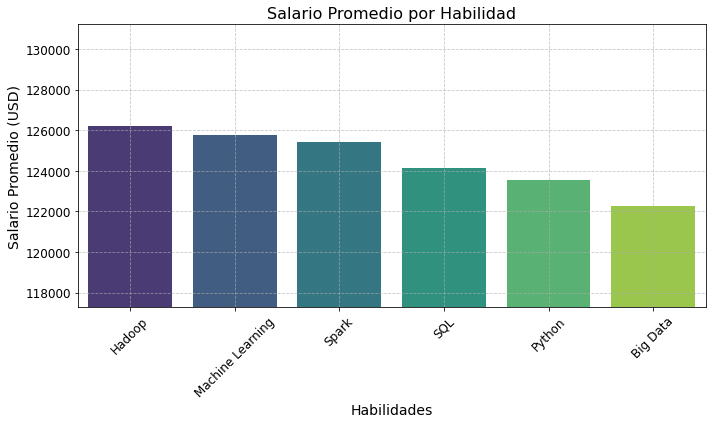

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la visualización del salario promedio por habilidad
plt.figure(figsize=(10, 6))
sns.barplot(x='Skill', y='Avg Salary', data=salary_df, palette="viridis")

# Personalizar el gráfico
plt.title('Salario Promedio por Habilidad', fontsize=16)
plt.xlabel('Habilidades', fontsize=14)
plt.ylabel('Salario Promedio (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Mejorar la legibilidad de los nombres de habilidades
plt.yticks(fontsize=12)  # Mejorar la legibilidad de los valores en el eje Y

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el rango del eje Y para que se vea más claramente
plt.ylim(min(salary_df['Avg Salary']) - 5000, max(salary_df['Avg Salary']) + 5000)  # Ajustar rango para mayor visibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()



#### Distribución de Salarios por Sector o Industria
Analizar cómo los salarios varían según el sector o la industria.

Ayuda a los empleadores a ver si están ofreciendo salarios competitivos en su sector y a los candidatos a entender qué industrias ofrecen mejores salarios.

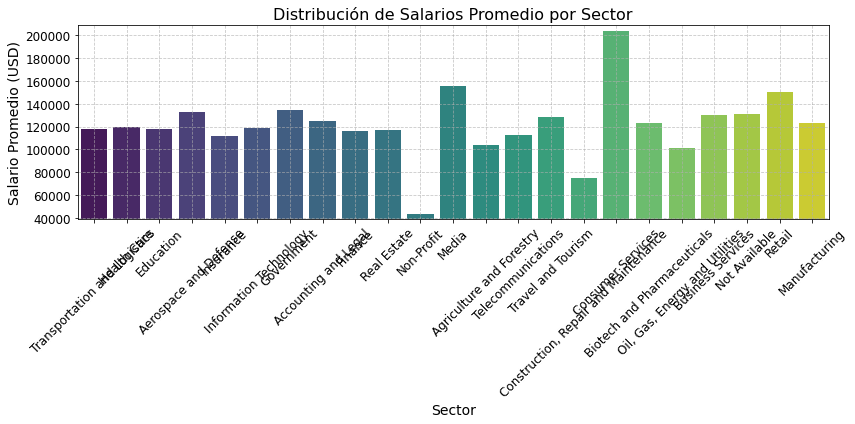

In [0]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por Sector y calcular el salario promedio
sector_salary_spark = df_cleaned.groupBy('Sector').agg(F.avg('avg_salary').alias('avg_salary'))

# Convertir a Pandas para visualización
sector_salary = sector_salary_spark.toPandas()

# Crear la visualización de la distribución de salarios por Sector
plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='avg_salary', data=sector_salary, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Salarios Promedio por Sector', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Salario Promedio (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Mejorar la legibilidad de los nombres de sector
plt.yticks(fontsize=12)  # Mejorar la legibilidad de los valores en el eje Y

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el rango del eje Y para que se vea más claramente
plt.ylim(min(sector_salary['avg_salary']) - 5000, max(sector_salary['avg_salary']) + 5000)  # Ajustar rango para mayor visibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Alternativa se puede hacer lo mismo pero con Industria

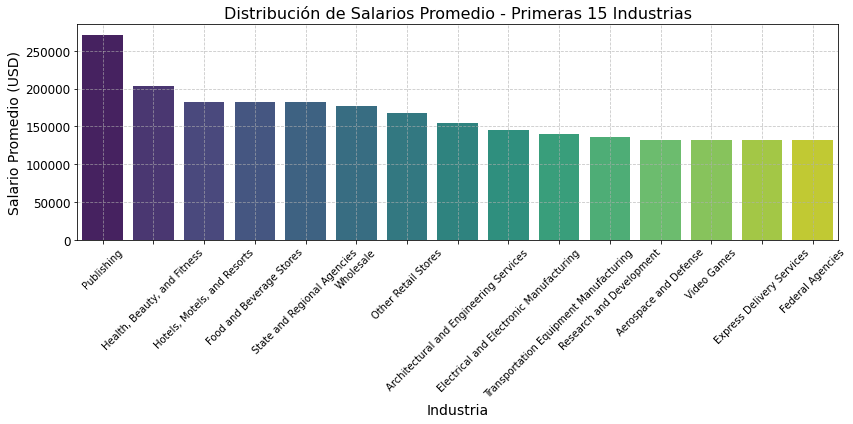

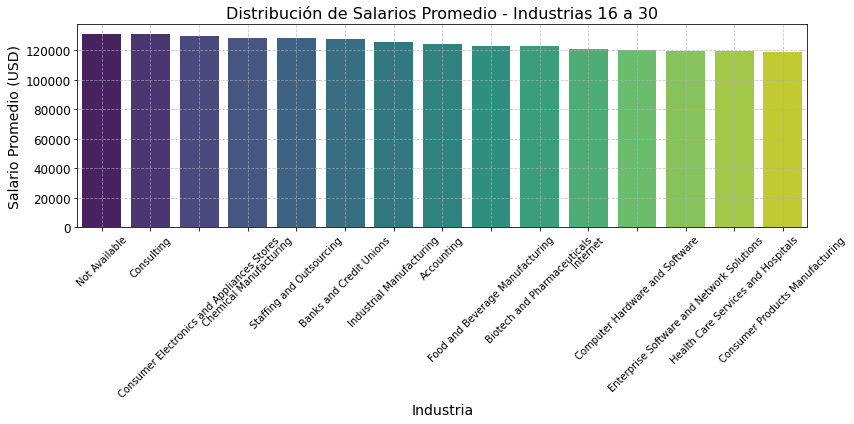

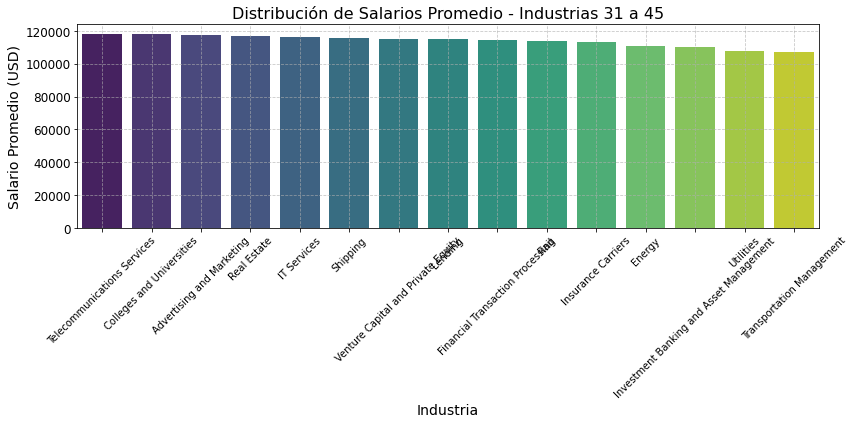

In [0]:
# Dividir las industrias en tres grupos (por ejemplo, las primeras 15, las siguientes 15 y las últimas 15)
industry_salary_sorted = industry_salary.sort_values(by='avg_salary', ascending=False)

# Primer grupo de industrias (primeras 15)
industry_group_1 = industry_salary_sorted.head(15)

# Segundo grupo de industrias (las siguientes 15)
industry_group_2 = industry_salary_sorted.iloc[15:30]

# Tercer grupo de industrias (las siguientes 15)
industry_group_3 = industry_salary_sorted.iloc[30:45]

# Crear la primera visualización para las primeras 15 industrias
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='avg_salary', data=industry_group_1, palette='viridis')
plt.title('Distribución de Salarios Promedio - Primeras 15 Industrias', fontsize=16)
plt.xlabel('Industria', fontsize=14)
plt.ylabel('Salario Promedio (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Mejorar la legibilidad de los nombres de industria
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Crear la segunda visualización para las siguientes 15 industrias (16 a 30)
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='avg_salary', data=industry_group_2, palette='viridis')
plt.title('Distribución de Salarios Promedio - Industrias 16 a 30', fontsize=16)
plt.xlabel('Industria', fontsize=14)
plt.ylabel('Salario Promedio (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Mejorar la legibilidad de los nombres de industria
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Crear la tercera visualización para las siguientes 15 industrias (31 a 45)
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='avg_salary', data=industry_group_3, palette='viridis')
plt.title('Distribución de Salarios Promedio - Industrias 31 a 45', fontsize=16)
plt.xlabel('Industria', fontsize=14)
plt.ylabel('Salario Promedio (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Mejorar la legibilidad de los nombres de industria
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### Análisis de la Demanda de Habilidades (Skills)
Ver qué habilidades están más demandadas en las ofertas de trabajo.

Proporciona a los candidatos información sobre qué habilidades son más solicitadas y les ayuda a enfocar su aprendizaje en las áreas más demandadas. También ayuda a los empleadores a comprender las tendencias en la demanda de habilidades.

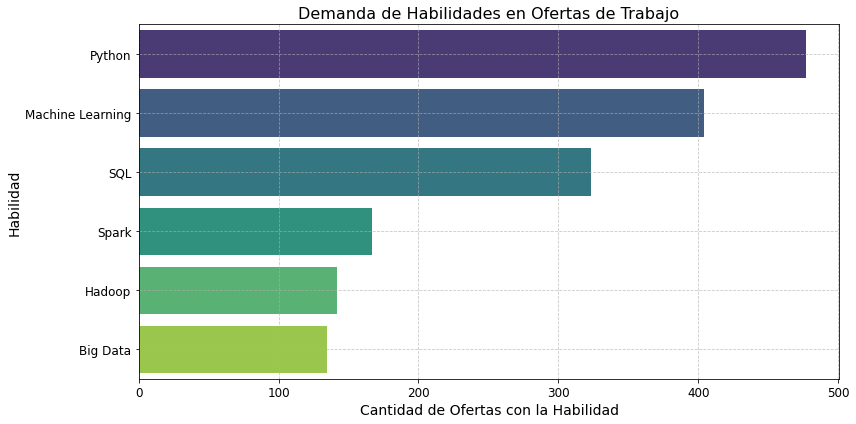

In [0]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Contamos las menciones (True) en cada columna de habilidad
skills_count = [F.sum(F.col(skill).cast('int')).alias(skill) for skill in skills_columns]

# Aplicamos la operación y convertimos el resultado a un DataFrame de Pandas
skills_count_df = df_cleaned.select(*skills_count).toPandas().melt(var_name='Skill', value_name='Demand Count')

# Ordenar por el número de menciones (demanda) de las habilidades
skills_count_df = skills_count_df.sort_values(by='Demand Count', ascending=False)

# Crear la visualización con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Demand Count', y='Skill', data=skills_count_df, palette='viridis')
plt.title('Demanda de Habilidades en Ofertas de Trabajo', fontsize=16)
plt.xlabel('Cantidad de Ofertas con la Habilidad', fontsize=14)
plt.ylabel('Habilidad', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Relación entre el Tamaño de la Empresa y el Salario
Ver si el tamaño de la empresa (Size) está relacionado con los salarios ofrecidos.

Proporciona a los candidatos información sobre qué tamaño de empresa podría ofrecer mejores salarios y puede ayudar a los empleadores a ajustar sus ofertas salariales según el tamaño de la empresa.

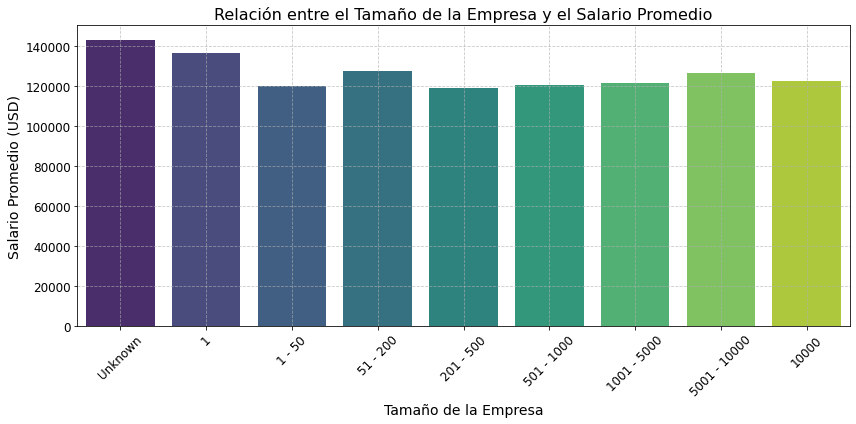

In [0]:
from pyspark.sql import functions as F

# Extraer el primer número de los rangos del tamaño de la empresa
df_cleaned = df_cleaned.withColumn(
    'Size Numeric',
    F.regexp_extract(df_cleaned['Size'], r'(\d+)', 1).cast('int')
)

# Agrupar por tamaño de empresa y calcular el salario promedio
salary_by_size = df_cleaned.groupBy('Size', 'Size Numeric').agg(F.avg('avg_salary').alias('Avg Salary'))

# Ordenar los resultados por el tamaño de la empresa (por el número extraído)
salary_by_size = salary_by_size.orderBy('Size Numeric')

# Convertir el resultado a Pandas para la visualización
salary_by_size_pd = salary_by_size.toPandas()

# Crear la visualización con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Size', y='Avg Salary', data=salary_by_size_pd, palette='viridis')
plt.title('Relación entre el Tamaño de la Empresa y el Salario Promedio', fontsize=16)
plt.xlabel('Tamaño de la Empresa', fontsize=14)
plt.ylabel('Salario Promedio (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Mejorar la legibilidad de las etiquetas
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Análisis de Ubicación y Salario
Ver cómo los salarios varían según la ubicación geográfica.

Permite a los candidatos tomar decisiones informadas sobre la ubicación de su próximo trabajo en función del salario. También puede ayudar a las empresas a identificar si están ofreciendo salarios competitivos según la ubicación.

In [0]:
from pyspark.sql import functions as F

# Agrupar por ciudad y estado, y calcular el salario promedio
salary_by_location = df_cleaned.groupBy('City', 'State').agg(F.avg('avg_salary').alias('Avg Salary'))

# Ordenar por salario promedio (de mayor a menor)
salary_by_location = salary_by_location.orderBy('Avg Salary', ascending=False)

# Convertir el resultado a Pandas para la visualización
salary_by_location_pd = salary_by_location.toPandas()

# Mostrar las primeras filas
salary_by_location_pd.head()


,City,State,Avg Salary
0,Fort Sam Houston,TX,271500.0
1,Pleasanton,CA,271500.0
2,Wilmington,DE,271500.0
3,Lexington Park,MD,203750.0
4,Dayton,OH,193500.0


In [0]:
# Obtener las ciudades ordenadas por salario promedio
salary_by_location_sorted = salary_by_location_pd.sort_values(by='Avg Salary', ascending=False)

# Dividir en 4 grupos
num_groups = 4
group_size = len(salary_by_location_sorted) // num_groups

# Crear los 4 grupos
group_1 = salary_by_location_sorted.iloc[:group_size]
group_2 = salary_by_location_sorted.iloc[group_size:2*group_size]
group_3 = salary_by_location_sorted.iloc[2*group_size:3*group_size]
group_4 = salary_by_location_sorted.iloc[3*group_size:]


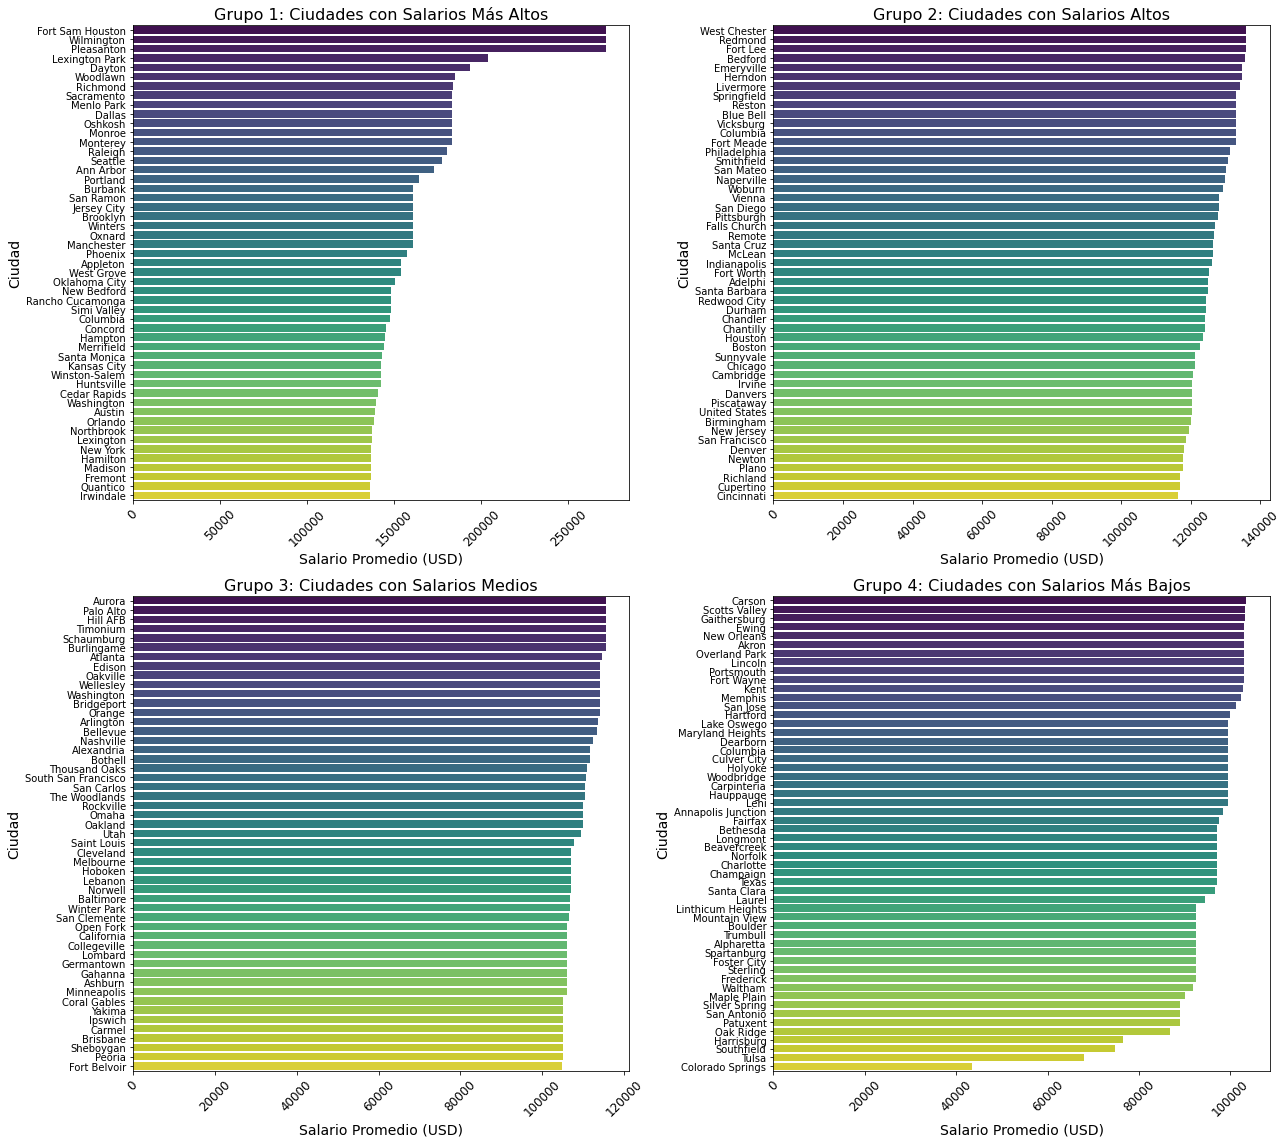

In [0]:
# Crear los gráficos
fig, axs = plt.subplots(2, 2, figsize=(18, 16))

# Primer gráfico: Primer grupo de ciudades
sns.barplot(x='Avg Salary', y='City', data=group_1, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Grupo 1: Ciudades con Salarios Más Altos', fontsize=16)
axs[0, 0].set_xlabel('Salario Promedio (USD)', fontsize=14)
axs[0, 0].set_ylabel('Ciudad', fontsize=14)
axs[0, 0].tick_params(axis='x', rotation=45, labelsize=12)

# Segundo gráfico: Segundo grupo de ciudades
sns.barplot(x='Avg Salary', y='City', data=group_2, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Grupo 2: Ciudades con Salarios Altos', fontsize=16)
axs[0, 1].set_xlabel('Salario Promedio (USD)', fontsize=14)
axs[0, 1].set_ylabel('Ciudad', fontsize=14)
axs[0, 1].tick_params(axis='x', rotation=45, labelsize=12)

# Tercer gráfico: Tercer grupo de ciudades
sns.barplot(x='Avg Salary', y='City', data=group_3, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Grupo 3: Ciudades con Salarios Medios', fontsize=16)
axs[1, 0].set_xlabel('Salario Promedio (USD)', fontsize=14)
axs[1, 0].set_ylabel('Ciudad', fontsize=14)
axs[1, 0].tick_params(axis='x', rotation=45, labelsize=12)

# Cuarto gráfico: Cuarto grupo de ciudades
sns.barplot(x='Avg Salary', y='City', data=group_4, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Grupo 4: Ciudades con Salarios Más Bajos', fontsize=16)
axs[1, 1].set_xlabel('Salario Promedio (USD)', fontsize=14)
axs[1, 1].set_ylabel('Ciudad', fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=45, labelsize=12)

# Ajustar el layout para evitar que las etiquetas se sobrepongan
plt.tight_layout()
plt.show()



#### Análisis de la Edad de la Compañía y su Relación con Salarios
Analizar si la antigüedad de la empresa (company_age) está asociada con los salarios ofrecidos.

Esto puede ayudar a los candidatos a identificar empresas establecidas con salarios más altos o empresas jóvenes con potencial de crecimiento.

In [0]:
from pyspark.sql import functions as F

# Filtrar filas donde 'company_age' y 'avg_salary' no son nulos
df_cleaned_filtered = df_cleaned.filter(df_cleaned['company_age'].isNotNull() & df_cleaned['avg_salary'].isNotNull())


# Agrupar por 'company_age' y calcular el salario promedio
salary_by_age = df_cleaned_filtered.groupBy('company_age').agg(F.avg('avg_salary').alias('avg_salary'))

# Verificar el resultado del cálculo
salary_by_age.show(5)



+-----------+------------------+
|company_age|        avg_salary|
+-----------+------------------+
|        8.0|114833.33333333333|
|       67.0|          133000.0|
|       70.0|109666.66666666667|
|        0.0|136135.51401869158|
|       69.0|           92500.0|
+-----------+------------------+
only showing top 5 rows



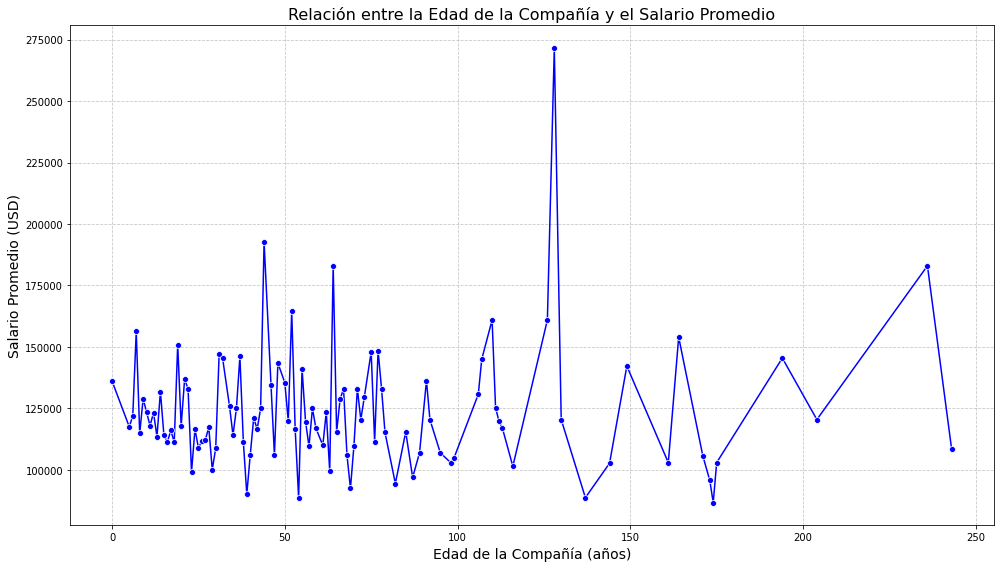

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir el DataFrame de PySpark a Pandas
salary_by_age_pd = salary_by_age.toPandas()

# Crear la gráfica
plt.figure(figsize=(14, 8))  # Tamaño de la figura
sns.lineplot(x='company_age', y='avg_salary', data=salary_by_age_pd, marker='o', color='b')

# Personalizar la gráfica
plt.title('Relación entre la Edad de la Compañía y el Salario Promedio', fontsize=16)
plt.xlabel('Edad de la Compañía (años)', fontsize=14)
plt.ylabel('Salario Promedio (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el diseño para que no se recorten elementos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


#### Análisis de la Satisfacción de los Empleados (Basado en la columna Rating)
Relacionar la satisfacción de los empleados con los salarios o el tipo de trabajo.

Esto ayuda a los candidatos a identificar empresas con una buena cultura laboral y beneficios salariales. Además, los empleadores pueden usar esta información para mejorar sus ambientes de trabajo y aumentar la satisfacción de los empleados.

<Figure size 1008x576 with 0 Axes>

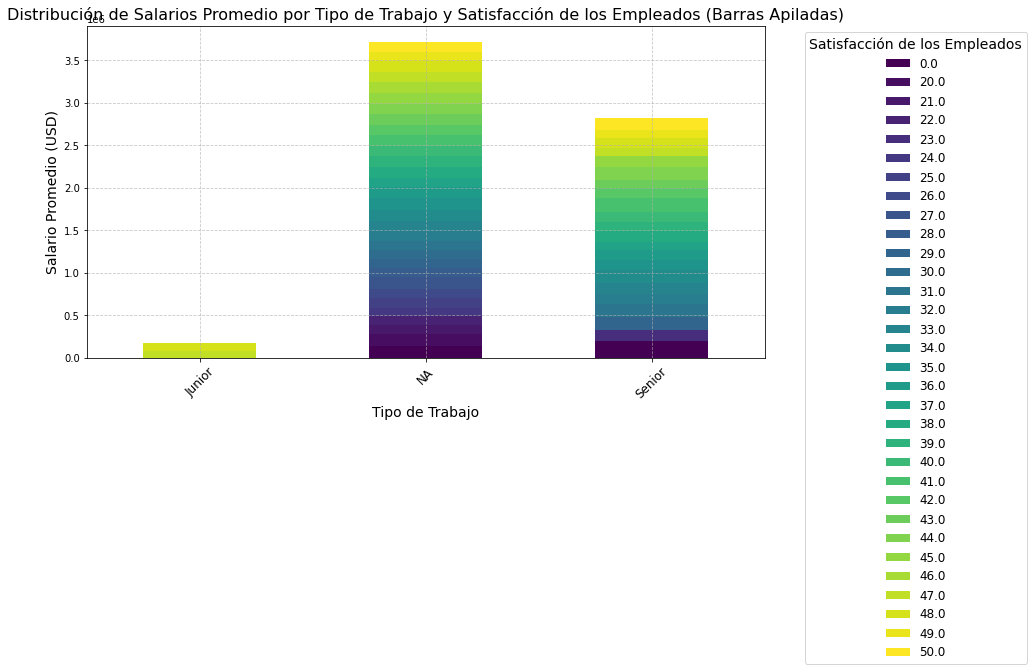

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Agrupar por Rating y Job Type, y calcular el salario promedio
salary_by_job_type_rating = df_cleaned.groupBy("Rating", "Job Type").agg(F.avg("avg_salary").alias("avg_salary"))

# Convertir el DataFrame de PySpark a Pandas
salary_by_job_type_rating_pd = salary_by_job_type_rating.toPandas()

# Pivotear para tener las categorías de Rating como columnas
salary_by_job_type_rating_pivot = salary_by_job_type_rating_pd.pivot_table(
    index="Job Type", columns="Rating", values="avg_salary", aggfunc="mean"
).fillna(0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))  # Tamaño de la figura
salary_by_job_type_rating_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar la gráfica
plt.title('Distribución de Salarios Promedio por Tipo de Trabajo y Satisfacción de los Empleados (Barras Apiladas)', fontsize=16)
plt.xlabel('Tipo de Trabajo', fontsize=14)
plt.ylabel('Salario Promedio (USD)', fontsize=14)

# Colocar la leyenda fuera de la gráfica
plt.legend(title='Satisfacción de los Empleados', title_fontsize=14, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el diseño para que no se recorten elementos
plt.tight_layout()

# Mostrar la gráfica
plt.show()



#### Análisis de Tipo de Trabajo y Habilidades
Ver qué habilidades son más comunes según el tipo de trabajo (Job Type).

Ayuda a los candidatos a saber qué habilidades desarrollar si están interesados en un tipo de trabajo específico. Además, permite a los reclutadores ajustar las descripciones de trabajo según las habilidades que buscan en los candidatos.

<Figure size 1008x576 with 0 Axes>

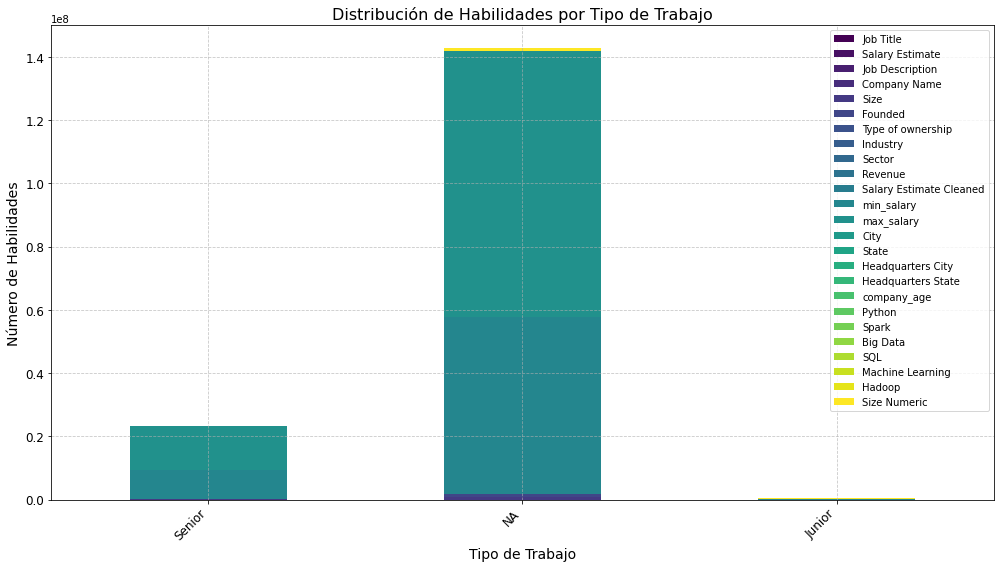

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Asegúrate de que las columnas de habilidades están en formato numérico (0 o 1)
# Vamos a suponer que las columnas de habilidades son habilidades técnicas como 'Python', 'SQL', etc.

# Aquí extraemos las columnas de habilidades de tu dataframe
skills_columns = [col for col in df_cleaned.columns if col not in ['Job Type', 'avg_salary', 'Rating']]  # Ejemplo de columnas de habilidades

# Contar cuántas veces cada habilidad está presente por tipo de trabajo
skills_by_job_type = df_cleaned.groupBy('Job Type').agg(*[F.sum(col).alias(col) for col in skills_columns])

# Convertir el DataFrame de PySpark a Pandas para visualizar con seaborn
skills_by_job_type_pd = skills_by_job_type.toPandas()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(14, 8))

# Plotear la gráfica de barras apiladas
skills_by_job_type_pd.set_index('Job Type').plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar la gráfica
plt.title('Distribución de Habilidades por Tipo de Trabajo', fontsize=16)
plt.xlabel('Tipo de Trabajo', fontsize=14)
plt.ylabel('Número de Habilidades', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el diseño para que no se recorten elementos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Definimos las habilidades de interés
skills = ['Python', 'Spark', 'Big Data', 'SQL', 'Machine Learning', 'Hadoop']

# Asegurémonos de que las columnas de habilidades seleccionadas existen en el DataFrame
df_cleaned = df_cleaned.select("Job Type", "avg_salary", *skills)

# Agrupar por 'Job Type' y calcular el salario promedio para cada habilidad seleccionada
salary_by_skill_and_job_type = df_cleaned.groupBy('Job Type').agg(
    *[F.avg(col).alias(col) for col in skills]
)

# Convertimos el DataFrame de PySpark a Pandas
salary_by_skill_and_job_type_pd = salary_by_skill_and_job_type.toPandas()

# Verificamos los primeros registros del DataFrame
salary_by_skill_and_job_type_pd.head()


,Job Type,Python,Spark,Big Data,SQL,Machine Learning,Hadoop
0,Senior,0.677419,0.301075,0.247312,0.483871,0.602151,0.258065
1,NA,0.734043,0.246454,0.198582,0.491135,0.617021,0.209220
2,Junior,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000


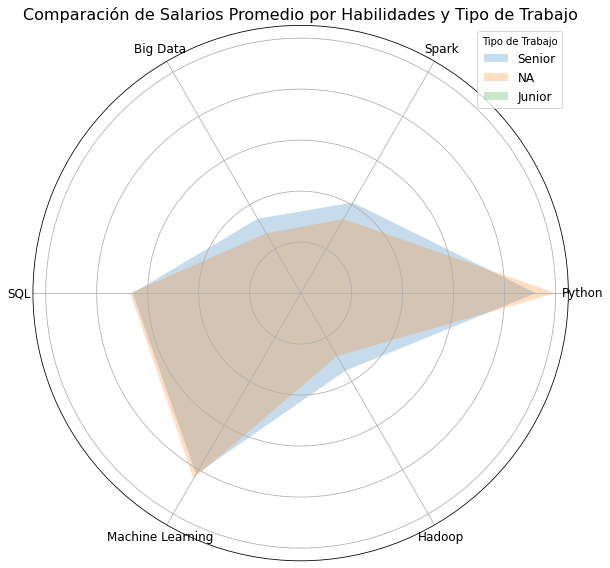

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Convertimos el DataFrame a Pandas si aún no se ha hecho
salary_by_skill_and_job_type_pd = salary_by_skill_and_job_type.toPandas()


# Definir las habilidades y los tipos de trabajo
skills = ['Python', 'Spark', 'Big Data', 'SQL', 'Machine Learning', 'Hadoop']
job_types = salary_by_skill_and_job_type_pd['Job Type'].unique()

# Configurar el gráfico de radar
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

# Normalizar los salarios promedio para las habilidades
max_salary = salary_by_skill_and_job_type_pd[skills].max().max()

# Configurar los ángulos para el gráfico de radar
angles = np.linspace(0, 2 * np.pi, len(skills), endpoint=False).tolist()

# Añadir los datos de cada tipo de trabajo al gráfico de radar
for job_type in job_types:
    job_data = salary_by_skill_and_job_type_pd[salary_by_skill_and_job_type_pd['Job Type'] == job_type][skills].values.flatten()
    ax.fill(angles, job_data / max_salary, alpha=0.25, label=job_type)  # Normalizamos el salario

# Personalizar la gráfica
ax.set_yticklabels([])  # Ocultar las etiquetas del eje Y
ax.set_xticks(angles)
ax.set_xticklabels(skills, fontsize=12)

# Añadir leyenda
plt.legend(title='Tipo de Trabajo', fontsize=12)

# Título y mostrar la gráfica
plt.title('Comparación de Salarios Promedio por Habilidades y Tipo de Trabajo', fontsize=16)
plt.tight_layout()
plt.show()

